In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ast import literal_eval
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report, recall_score, f1_score, precision_recall_fscore_support

In [2]:
%time datos = pd.read_csv('data_equilibrada.csv')

Wall time: 18 ms


In [3]:
datos.shape

(1479, 3)

In [4]:
%time datos.tokens=datos.tokens.apply(literal_eval)

Wall time: 151 ms


In [5]:
bow = pd.read_csv('bow.csv')

In [6]:
%time tfidf=pd.DataFrame(TfidfVectorizer(vocabulary=bow.token.values).fit_transform(datos['tokens'].str.join(" ")).toarray(), columns=bow.token.values)

Wall time: 68.9 ms


In [7]:
tfidf

,stop,unsubscrib,verifi,inform,request,thank,address,lafargeholcim,benefit,com,...,chart,brotherhood,tanker,driver,vous,webmanag,theworknumb,ppay,tci,usf
0,0.000000,0.000000,0.093465,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.062238,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.000000,0.126601,0.000000,0.093610,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.070336,0.071192,0.000000,0.000000,0.000000,0.084040,0.000000,0.099912,0.119191,0.114623,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1474,0.084983,0.086018,0.000000,0.000000,0.000000,0.101541,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1475,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1476,0.019315,0.019551,0.000000,0.000000,0.000000,0.000000,0.000000,0.082313,0.000000,0.031478,...,0.0,0.0,0.0,0.0,0.447812,0.0,0.0,0.0,0.0,0.0
1477,0.107704,0.109015,0.000000,0.000000,0.000000,0.128688,0.000000,0.000000,0.000000,0.175520,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    tfidf.values, datos.etiquetas.values, test_size=0.2, random_state=42)

In [9]:
cms_train=[]
cms_test=[]
accuracy_train = []
accuracy_test = []
f1_train = []
f1_test = []
recall_train = []
recall_test = []
reporte_train = []
reporte_test = []
max_depths = np.arange(10,110,10)
for max_depth in max_depths:
    print("max_depth:",max_depth)
    knn = DecisionTreeClassifier(max_depth=max_depth,class_weight='balanced')
    knn.fit(X_train, y_train)

    predicciones_train=knn.predict(X_train)
    predicciones_test=knn.predict(X_test)

    cms_train.append(confusion_matrix(y_train,predicciones_train))
    cms_test.append(confusion_matrix(y_test,predicciones_test))
    accuracy_train.append(accuracy_score(y_train,predicciones_train))
    accuracy_test.append(accuracy_score(y_test,predicciones_test))
    f1_train.append(f1_score(y_train,predicciones_train,average='weighted'))
    f1_test.append(f1_score(y_test,predicciones_test,average='weighted'))
    recall_train.append(recall_score(y_train,predicciones_train,average='weighted'))
    recall_test.append(recall_score(y_test,predicciones_test,average='weighted'))
    reporte_train.append(precision_recall_fscore_support(y_train,predicciones_train))
    reporte_test.append(precision_recall_fscore_support(y_test,predicciones_test))
    
    print("Train:")
    print(cms_train[-1])
    print(classification_report(y_train,predicciones_train))

    print("Test:")
    print(cms_test[-1])
    print(classification_report(y_test,predicciones_test))
    print("-----------")

max_depth: 10
Train:
[[ 42   0   0   1  35  65   6]
 [  2 101   0   0  84  44   0]
 [  0   0 143   1  37   0   0]
 [  0   0   0 129  17  27   0]
 [  0   0   0   0 125  34   1]
 [  0   0   0   0  16 131   0]
 [  6   0   0   0  17  43  76]]
              precision    recall  f1-score   support

           0       0.84      0.28      0.42       149
           1       1.00      0.44      0.61       231
           2       1.00      0.79      0.88       181
           3       0.98      0.75      0.85       173
           4       0.38      0.78      0.51       160
           5       0.38      0.89      0.53       147
           6       0.92      0.54      0.68       142

    accuracy                           0.63      1183
   macro avg       0.79      0.64      0.64      1183
weighted avg       0.81      0.63      0.65      1183

Test:
[[ 9  1  0  0 11 15  1]
 [ 0 22  0  0 19 12  1]
 [ 0  0 35  0  6  0  0]
 [ 0  0  0 25  6  5  0]
 [ 0  0  0  0 33  4  2]
 [ 0  0  0  0  8 43  0]
 [ 2  0  0  0 

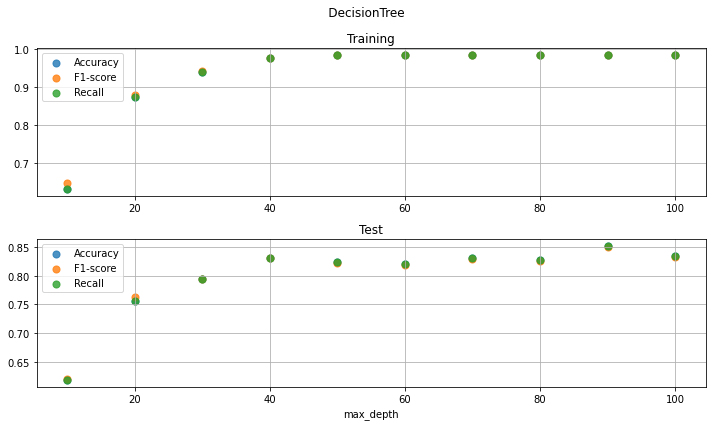

In [38]:
fig,ax=plt.subplots(2,1,figsize=(10,6),tight_layout=True)
fig.suptitle("     DecisionTree")
ax[0].scatter(max_depths,accuracy_train,s=50,alpha=0.8, label = 'Accuracy')
ax[0].scatter(max_depths,f1_train,s=50,alpha=0.8, label = 'F1-score')
ax[0].scatter(max_depths,recall_train,s=50,alpha=0.8, label = 'Recall')
ax[0].legend()
ax[0].grid()
ax[0].set_title('Training')
# ax[0].set_xlabel('max_depth')

ax[1].scatter(max_depths,accuracy_test,s=50,alpha=0.8, label = 'Accuracy')
ax[1].scatter(max_depths,f1_test,s=50,alpha=0.8, label = 'F1-score')
ax[1].scatter(max_depths,recall_test,s=50,alpha=0.8, label = 'Recall')
ax[1].legend()
ax[1].grid()
ax[1].set_title('Test')
ax[1].set_xlabel('max_depth')

plt.show()